In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt


In [3]:
# Load dataset
df = pd.read_csv("creditcard.csv")

# Features and target
X = df.drop("Class", axis=1)
y = df["Class"]


In [5]:
df_cleaned = df.dropna(subset=['Class'])
X = df_cleaned.drop("Class", axis=1)
y = df_cleaned["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [7]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[15088     4]
 [    7    30]]


In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


Accuracy: 0.9992729195584639
Precision: 0.8823529411764706
Recall: 0.8108108108108109


In [9]:
print("F1 Score:", f1_score(y_test, y_pred))


F1 Score: 0.8450704225352113


ROC-AUC Score: 0.9052728848647217


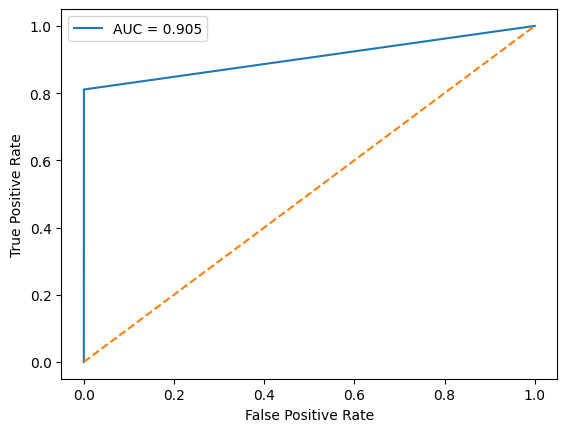

In [10]:
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label="AUC = " + str(round(roc_auc, 3)))
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [11]:
skf = StratifiedKFold(n_splits=5)

cv_scores = cross_val_score(
    model,
    X,
    y,
    cv=skf,
    scoring="f1"
)

print("Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", cv_scores.mean())


Cross-Validation F1 Scores: [0.00499757 0.49230769 0.72131148 0.83783784 0.7       ]
Mean F1 Score: 0.5512909152361513
